In [42]:
from pathlib import Path
import pandas as pd
import plotly.graph_objects as go
import os
import numpy as np

acmg_df = pd.read_csv("resources/acmg_hkgi.tier_sankey.csv")

########################
##### ACMG vs HKGP #####
########################
acmg_ordered_labels = [
    'A_tier_1', 'A_tier_2', 'A_tier_3', 'A_tier_4',
    'H_tier_1', 'H_tier_2', 'H_tier_3', 'H_tier_4'
]

# Create the Sankey diagram with explicit node positions
node_x = [0.001, 0.001, 0.001, 0.001, 0.4, 0.4, 0.4, 0.4]
node_y = [0.001, 0.15, 0.50, 0.85, 0.001, 0.15, 0.35, 0.75]

# Calculate the sum of values for each target node (H_tier_1 to H_tier_4)
target_sums = {}
for target_idx in range(4, 8):
    target_sums[target_idx] = acmg_df[acmg_df['target_index'] == target_idx]['value'].sum()

In [43]:
acmg_df

,beginning,target,value,color,source_index,target_index
0,A_tier_1,H_tier_1,5,"rgba(75, 130, 255, .2)",0,4
1,A_tier_2,H_tier_2,6,"rgba(219, 68, 55, .2)",1,5
2,A_tier_2,H_tier_3,5,"rgba(77, 233, 171, .2)",1,6
3,A_tier_2,H_tier_4,25,"rgba(254, 229, 76, .2)",1,7
4,A_tier_3,H_tier_3,7,"rgba(77, 233, 171, .2)",2,6
5,A_tier_3,H_tier_4,57,"rgba(254, 229, 76, .2)",2,7
6,A_tier_4,H_tier_2,13,"rgba(219, 68, 55, .2)",3,5
7,A_tier_4,H_tier_3,25,"rgba(77, 233, 171, .2)",3,6


In [44]:
target_sums

{4: np.int64(5), 5: np.int64(19), 6: np.int64(37), 7: np.int64(82)}

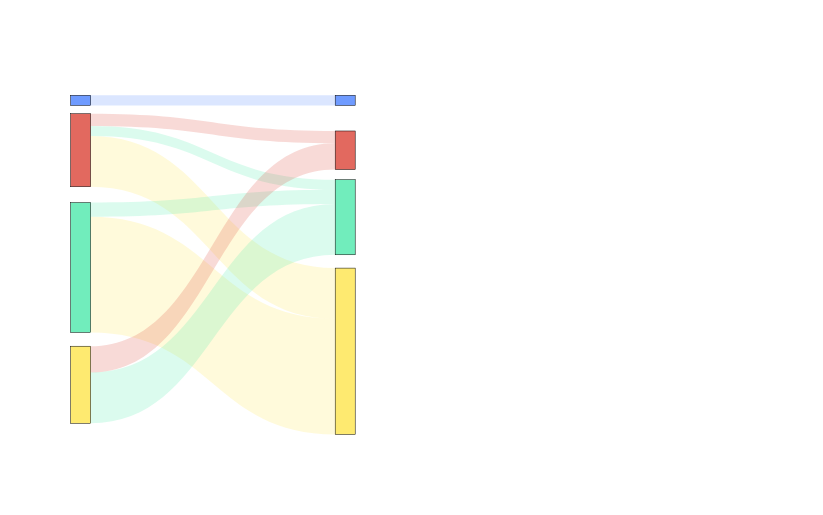

In [45]:
# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        x=node_x,
        y=node_y,
        color=[
            'rgba(75, 130, 255, .8)', 'rgba(219, 68, 55, .8)', 'rgba(77, 233, 171, .8)', 'rgba(254, 229, 76, .8)',
            'rgba(75, 130, 255, .8)', 'rgba(219, 68, 55, .8)', 'rgba(77, 233, 171, .8)', 'rgba(254, 229, 76, .8)'
        ],
        # label=acmg_ordered_labels
    ),
    link=dict(
        source=acmg_df['source_index'],
        target=acmg_df['target_index'],
        value=acmg_df['value'], 
        color=acmg_df['color']
    )
))


fig.update_layout(
    title_text='',
    width=1000, height=500, 
    font_size=14, 
    xaxis={
        'showgrid': False,
        'zeroline': False,
        'visible': False,
    },
    yaxis={
        'showgrid': False,
        'zeroline': False,
        'visible': False,
    }, 
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()

In [ ]:
fig.write_image("results/acmg_hkgi_sankey.svg")